# Cleaning of raw data of natural gas movements

The aim is to clean the raw data: deliting useless raws/columns, interpolating missing values, correcting if something is wrong. At the end we save the dataframe cleaned, that will be used for the representation of raw data in the dashboard.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import auxiliary_functions as af

In [2]:
# Reading the file
df = pd.read_csv('GTF_export_202401.csv', delimiter=';')

In [3]:
# The column MAXFLOW is not relevant for our studies
df = df.drop(columns=["MAXFLOW (Mm3/h)"])

# The study is focused on natural gas exchange between countries. The distintion between borderpoints is not relevant.
df = df.drop(columns=["Borderpoint"])

In [4]:
# For gaps of maximum 3 months data are interpoalted
df.interpolate(inplace = True, limit = 3)
df[df.isnull().any(axis='columns')]
# For larger gaps WE DECIDE WHAT TO DO (they have to be fixed before the grouping)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2600\397077057.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace = True, limit = 3)


,Exit,Entry,Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,Mar-09,Apr-09,May-09,...,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24
16,Ukraine,Hungary,872.0,941.0,1111.0,498.0,605.0,306.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.0
221,Spain,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,562.000000,513.000000,265.000000,110.000000,39.000000,57.000000,181.000000,305.000000,76.000000,11.0
222,Belgium,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,481.714286,439.714286,227.142857,94.285714,33.428571,48.857143,155.857143,262.714286,65.142857,182.0
223,Netherlands,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,401.428571,366.428571,189.285714,78.571429,27.857143,40.714286,130.714286,220.428571,54.285714,224.0
224,Belgium,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,321.142857,293.142857,151.428571,62.857143,22.285714,32.571429,105.571429,178.142857,43.428571,1356.0
225,Belgium,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
226,France,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749.0
227,Netherlands,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0


In [5]:
# In the previous jupyter notebook is shown that there are rows with same "exit" and "entry"; now this will be fixed doing summation of flows.
df = df.groupby(['Exit', 'Entry'], as_index=False)[df.columns[2:]].sum()
df

,Exit,Entry,Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,Mar-09,Apr-09,May-09,...,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24
0,Albania,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,860.0,806.0,134.0,119.0,71.0,125.0,70.000000,882.0,804.000000,878.000000
1,Algeria,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,619.0,698.0,448.0,767.0,696.0,709.0,863.000000,829.0,818.000000,815.000000
2,Algeria,Tunisia,2170.0,2041.0,2532.0,2688.0,2435.0,2205.0,2180.0,1514.0,...,233.0,199.0,309.0,367.5,417.5,526.0,607.333333,803.0,690.333333,630.000000
3,Austria,Germany,175.0,195.0,314.0,425.0,332.0,325.0,200.0,89.0,...,0.0,0.0,0.0,0.0,0.0,29.0,57.000000,137.0,68.000000,70.000000
4,Austria,Hungary,170.0,208.0,203.0,197.0,137.0,215.0,0.0,0.0,...,260.0,395.0,290.0,402.0,231.0,71.0,19.000000,31.0,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,United Kingdom,Ireland,396.0,418.0,430.0,430.0,394.0,398.0,419.0,415.0,...,314.0,310.0,273.0,296.0,274.0,246.0,289.000000,340.0,308.000000,424.000000
140,United Kingdom,Isle Of Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,10.0,10.0,11.0,11.0,4.0,11.000000,13.0,655.500000,618.000000
141,United Kingdom,Liquefied Natural Gas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,437.000000,412.000000
142,United Kingdom,Netherlands,77.0,51.0,81.0,90.0,123.0,133.0,111.0,0.0,...,476.0,503.0,227.0,329.0,247.0,145.0,11.000000,34.0,290.666667,156.333333


In [6]:
# Reorganizing the dataframe in a different structure
dt_index = df.columns[2:]
dt_index = pd.to_datetime(dt_index, format='%b-%y')
flows_df = pd.DataFrame(index=dt_index)
for row in df.values:
    flowname = "->".join([row[0], row[1]])
    flows_df[flowname] = row[2:]
flows_df = flows_df.rename_axis("Month")
flows_df

C:\Users\Hp\AppData\Local\Temp\ipykernel_2600\712734219.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  flows_df[flowname] = row[2:]
C:\Users\Hp\AppData\Local\Temp\ipykernel_2600\712734219.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  flows_df[flowname] = row[2:]
C:\Users\Hp\AppData\Local\Temp\ipykernel_2600\712734219.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

,Albania->Italy,Algeria->Spain,Algeria->Tunisia,Austria->Germany,Austria->Hungary,Austria->Italy,Austria->Slovak Republic,Austria->Slovenia,Austria->Switzerland,Belarus->Lithuania,...,"Ukraine->Moldova, Republic",Ukraine->Poland,Ukraine->Romania,Ukraine->Slovak Republic,United Kingdom->Belgium,United Kingdom->Ireland,United Kingdom->Isle Of Man,United Kingdom->Liquefied Natural Gas,United Kingdom->Netherlands,United Kingdom->Norway
Month,,,,,,,,,,,,,,,,,,,,,
2008-10-01,0.0,0.0,2170.0,175.0,170.0,1615.0,0.0,176.0,6.0,346.0,...,391.0,408.0,1564.0,5485.0,945.0,396.0,0.0,0.0,77.0,3.0
2008-11-01,0.0,0.0,2041.0,195.0,208.0,1972.0,0.0,165.0,8.0,401.0,...,325.0,406.0,1645.0,5309.0,404.0,418.0,0.0,0.0,51.0,3.0
2008-12-01,0.0,0.0,2532.0,314.0,203.0,2448.0,0.0,143.0,9.0,394.0,...,270.0,444.0,1732.0,5946.0,174.0,430.0,0.0,0.0,81.0,0.0
2009-01-01,0.0,0.0,2688.0,425.0,197.0,1310.0,0.0,144.0,10.0,402.0,...,184.0,141.0,827.0,2885.0,762.0,430.0,0.0,0.0,90.0,0.0
2009-02-01,0.0,0.0,2435.0,332.0,137.0,1565.0,0.0,141.0,8.0,432.0,...,141.0,325.0,1293.0,3714.0,216.0,394.0,0.0,0.0,123.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,125.0,709.0,526.0,29.0,71.0,99.0,2.0,29.0,2.0,143.0,...,342.5,0.0,0.0,977.0,238.0,246.0,4.0,0.0,145.0,186.0
2023-10-01,70.0,863.0,607.333333,57.0,19.0,68.0,46.0,29.0,4.0,272.0,...,360.0,0.0,0.0,1072.0,557.0,289.0,11.0,0.0,11.0,319.0
2023-11-01,882.0,829.0,803.0,137.0,31.0,40.0,20.0,56.0,6.0,248.0,...,411.5,136.0,0.0,1102.0,339.0,340.0,13.0,0.0,34.0,169.5


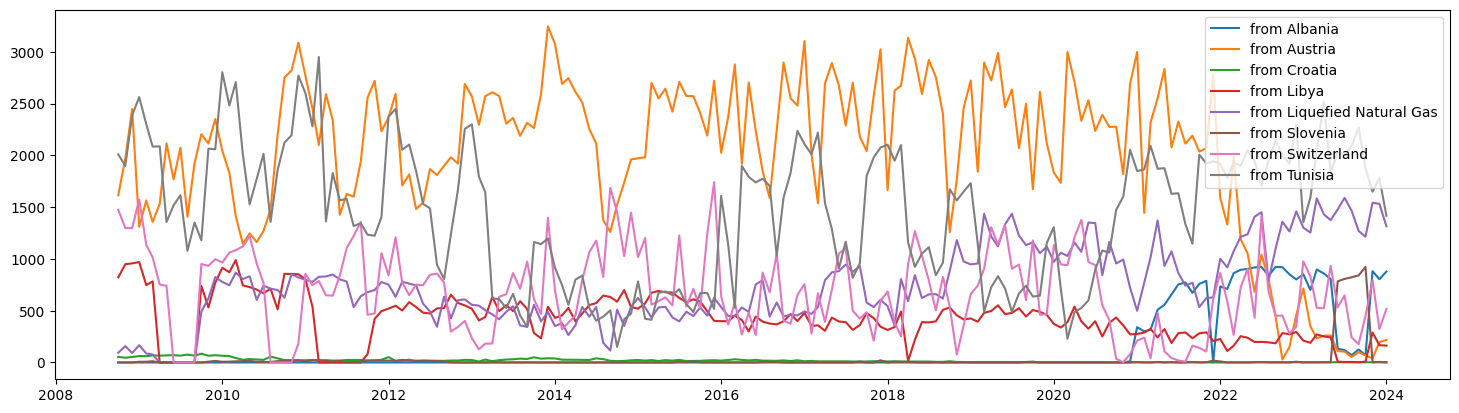

In [7]:
# As example and to see if the code works, plot the natural gas that enter in Italy
italy_entries = af.entry_flows("Italy", flows_df)
plt.figure().set_figwidth(18)
for col in italy_entries.columns:
    plt.plot(italy_entries[col], label=col)
plt.legend()
plt.show()

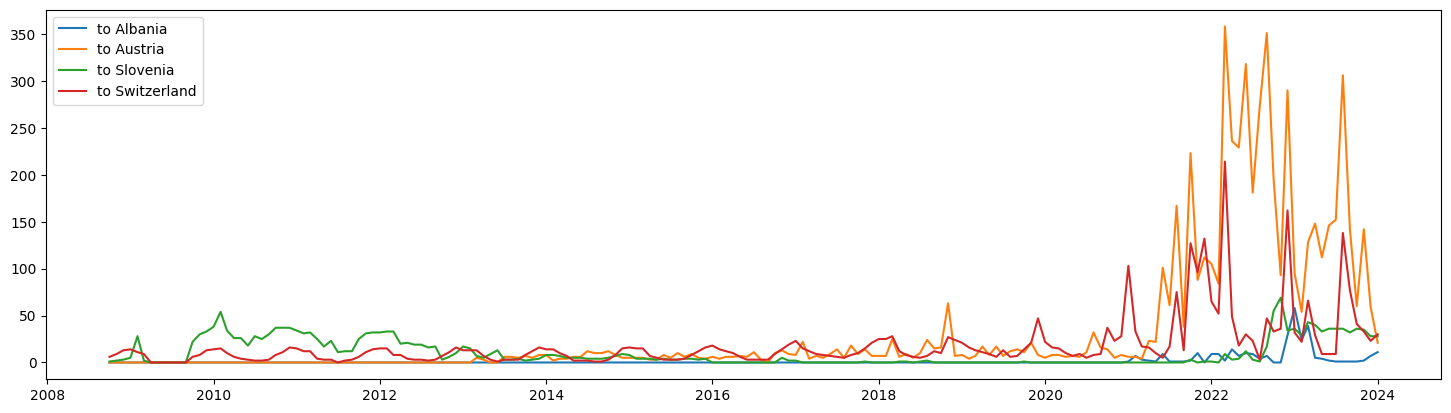

In [8]:
# Plot of the natural gas that exit from Italy 
italy_exits = af.exit_flows("Italy", flows_df)
plt.figure().set_figwidth(18)
for col in italy_exits.columns:
    plt.plot(italy_exits[col], label=col)
plt.legend()
plt.show()

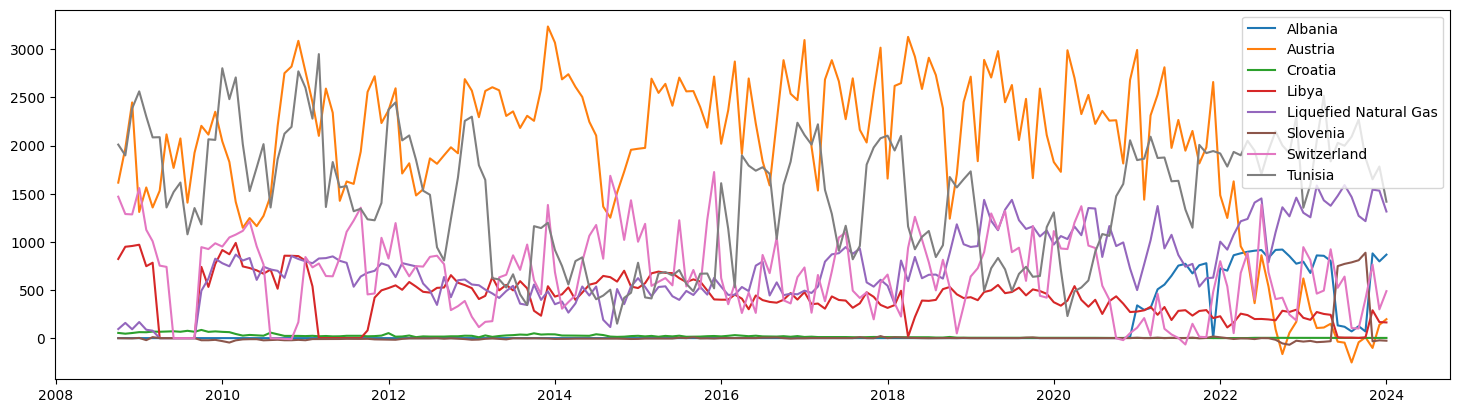

In [9]:
# Try the function flows_from_direction
prova = af.flows_from_direction("Italy", flows_df, "net")
plt.figure().set_figwidth(18)
for col in prova.columns:
    plt.plot(prova[col], label=col)
plt.legend()
plt.show()

In [10]:
# Saving the cleaned file that is used for the dashboard
flows_df.to_csv('GTF_export_cleaned.csv', encoding='utf-8', index=True)